<a href="https://colab.research.google.com/github/pammehta2017/The_R_Programming_Environment/blob/master/Churnrate(v8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [2]:
pwd

'/content'

In [3]:
df = pd.read_csv('Hiring_Challenge.csv', na_values='?')

In [4]:
#check the head of the data
print(df.head(10))

  C1     C2      C3 C4 C5  C6 C7  ...  C10 C11 C12  C13    C14    C15  Hired
0  b  30.83   0.000  u  g   w  v  ...    t   1   f    g  202.0      0      1
1  a  58.67   4.460  u  g   q  h  ...    t   6   f    g   43.0    560      1
2  a  24.50   0.500  u  g   q  h  ...    f   0   f    g  280.0    824      1
3  b  27.83   1.540  u  g   w  v  ...    t   5   t    g  100.0      3      1
4  b  20.17   5.625  u  g   w  v  ...    f   0   f    s  120.0      0      1
5  b  32.08   4.000  u  g   m  v  ...    f   0   t    g  360.0      0      1
6  b  33.17   1.040  u  g   r  h  ...    f   0   t    g  164.0  31285      1
7  a  22.92  11.585  u  g  cc  v  ...    f   0   f    g   80.0   1349      1
8  b  54.42   0.500  y  p   k  h  ...    f   0   f    g  180.0    314      1
9  b  42.50   4.915  y  p   w  v  ...    f   0   t    g   52.0   1442      1

[10 rows x 16 columns]


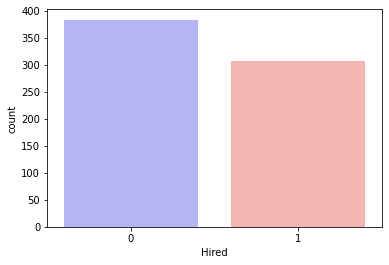

In [5]:
df.Hired.value_counts()
sns.countplot(x="Hired", data=df, palette="bwr")

In [6]:
NotHired = len(df[df.Hired == 0])
Hired = len(df[df.Hired == 1])
print("Percentage of Empoyees not Hired: {:.2f}%".format((NotHired / (len(df.Hired))*100)))
print("Percentage of Empoyees Hired: {:.2f}%".format((Hired / (len(df.Hired))*100)))

Percentage of Empoyees not Hired: 55.51%
Percentage of Empoyees Hired: 44.49%


In [7]:
# summarize the number of rows with missing values for each column
for i in range(df.shape[1]):
# count number of rows with missing values
    n_miss = df.iloc[:,i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 12 (1.7%)
> 1, Missing: 12 (1.7%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 6 (0.9%)
> 4, Missing: 6 (0.9%)
> 5, Missing: 9 (1.3%)
> 6, Missing: 9 (1.3%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 13 (1.9%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)


In [8]:
df.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'Hired'],
      dtype='object')

In [9]:
## Splitting the dataset into categorical and Numerical based on the columns
num = [col for col in df.columns if df[col].dtypes != 'O']
cat = [col for col in df.columns if df[col].dtypes == 'O']
print(num)
print(cat)

['C2', 'C3', 'C8', 'C11', 'C14', 'C15', 'Hired']
['C1', 'C4', 'C5', 'C6', 'C7', 'C9', 'C10', 'C12', 'C13']


In [10]:
#1 Number of categories in missing value columns
print("Number of Categories in: ")
for ColName in df[cat]:
    print("{} = {}".format(ColName,len(df[ColName].unique())))
    
##2 Function to replace NAN values with mode value
def impute_nan_most_frequent_category(df,ColName):
    print(df)
    # .mode()[0] - gives first category name
    most_frequent_category = df[ColName].mode()[0]
    print(most_frequent_category)
   # replace nan values with most occured category
    df[ColName].fillna(most_frequent_category,inplace=True)
    return df

#3 Call function to impute most occured category
for Columns in cat:
    impute_nan_most_frequent_category(df,ColName = Columns)
    
# Checking the output for categorical data
df[cat].isna().sum()

Number of Categories in: 
C1 = 3
C4 = 4
C5 = 4
C6 = 15
C7 = 10
C9 = 2
C10 = 2
C12 = 2
C13 = 3
    C1     C2      C3 C4 C5  C6  C7  ...  C10 C11 C12  C13    C14  C15  Hired
0    b  30.83   0.000  u  g   w   v  ...    t   1   f    g  202.0    0      1
1    a  58.67   4.460  u  g   q   h  ...    t   6   f    g   43.0  560      1
2    a  24.50   0.500  u  g   q   h  ...    f   0   f    g  280.0  824      1
3    b  27.83   1.540  u  g   w   v  ...    t   5   t    g  100.0    3      1
4    b  20.17   5.625  u  g   w   v  ...    f   0   f    s  120.0    0      1
..  ..    ...     ... .. ..  ..  ..  ...  ...  ..  ..  ...    ...  ...    ...
685  b  21.08  10.085  y  p   e   h  ...    f   0   f    g  260.0    0      0
686  a  22.67   0.750  u  g   c   v  ...    t   2   t    g  200.0  394      0
687  a  25.25  13.500  y  p  ff  ff  ...    t   1   t    g  200.0    1      0
688  b  17.92   0.205  u  g  aa   v  ...    f   0   f    g  280.0  750      0
689  b  35.00   3.375  u  g   c   h  ...    f   

C1     0
C4     0
C5     0
C6     0
C7     0
C9     0
C10    0
C12    0
C13    0
dtype: int64

In [11]:
## Applying KNN algorithm for Numerical columns missing value imputation
from sklearn.impute import KNNImputer
import numpy as np

imputer = KNNImputer(n_neighbors= 5)
df[num] = imputer.fit_transform(df[num])
print(df[num].isna().sum())

C2       0
C3       0
C8       0
C11      0
C14      0
C15      0
Hired    0
dtype: int64


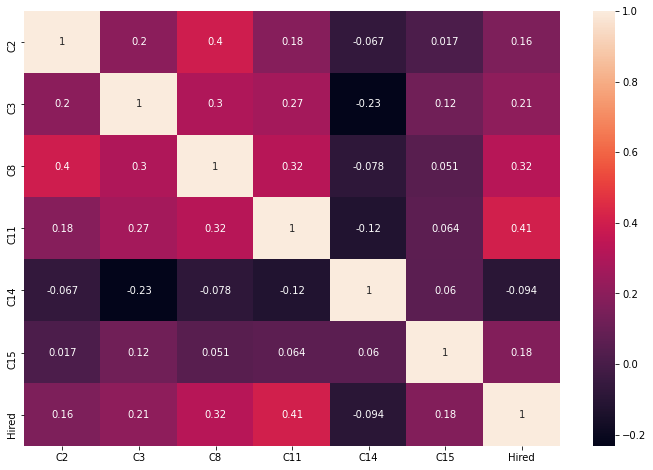

In [12]:
## Co-relation: Con: Can only find relation between Numberical variables
figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [14]:
!pip install ppscore

     |████████████████████████████████| 51kB 4.9MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13050 sha256=95f960487d07b554ca6c1a2fc6e3672df8a29f739c2c332399bcbf245a887017
  Stored in directory: /root/.cache/pip/wheels/50/cc/8f/d0da07e4ec4e7a4c4cf32aee9057e4d1c318de910543b4684e
Successfully built ppscore


In [15]:
# PPScore Matrix 
# Predictive Power Score works similar to the coefficient of correlation but has some additional functionalities like:
## It works on both Linear and Non-Linear Relationships
## Can be applied to both Numeric and Categorical columns
## It finds more patterns in the data.
import ppscore as pps
import seaborn as sns
pps_matix = pps.matrix(df)
print(pps_matix.head(5))

    x   y  ...  model_score                                              model
0  C1  C1  ...     1.000000                                               None
1  C1  C2  ...     9.396081  DecisionTreeRegressor(ccp_alpha=0.0, criterion...
2  C1  C3  ...     3.955325  DecisionTreeRegressor(ccp_alpha=0.0, criterion...
3  C1  C4  ...     0.657546  DecisionTreeClassifier(ccp_alpha=0.0, class_we...
4  C1  C5  ...     0.657546  DecisionTreeClassifier(ccp_alpha=0.0, class_we...

[5 rows x 9 columns]


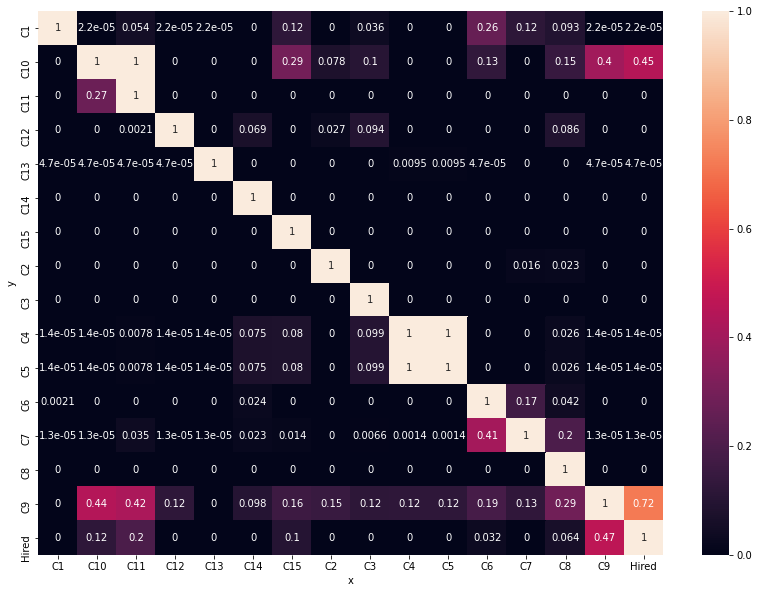

In [16]:
figure(figsize=(14,10))
matrix_df = pps.matrix(df).pivot(columns='x', index='y',  values='ppscore')
sns.heatmap(matrix_df, annot=True)

In [17]:
# Droppng column C5 as PPscore beyween C4 and C5 is 1
df.drop('C5', axis=1, inplace= True)
print(df.columns)
print(df.info())

Index(['C1', 'C2', 'C3', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12',
       'C13', 'C14', 'C15', 'Hired'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      690 non-null    object 
 1   C2      690 non-null    float64
 2   C3      690 non-null    float64
 3   C4      690 non-null    object 
 4   C6      690 non-null    object 
 5   C7      690 non-null    object 
 6   C8      690 non-null    float64
 7   C9      690 non-null    object 
 8   C10     690 non-null    object 
 9   C11     690 non-null    float64
 10  C12     690 non-null    object 
 11  C13     690 non-null    object 
 12  C14     690 non-null    float64
 13  C15     690 non-null    float64
 14  Hired   690 non-null    float64
dtypes: float64(7), object(8)
memory usage: 81.0+ KB
None


In [18]:
# Separating the dependent variable
X = df.drop('Hired', axis= 1)
y = df['Hired']

In [19]:
# One hot encoding ffor categorical variables
X = pd.get_dummies(X)
X.columns

Index(['C2', 'C3', 'C8', 'C11', 'C14', 'C15', 'C1_a', 'C1_b', 'C4_l', 'C4_u',
       'C4_y', 'C6_aa', 'C6_c', 'C6_cc', 'C6_d', 'C6_e', 'C6_ff', 'C6_i',
       'C6_j', 'C6_k', 'C6_m', 'C6_q', 'C6_r', 'C6_w', 'C6_x', 'C7_bb',
       'C7_dd', 'C7_ff', 'C7_h', 'C7_j', 'C7_n', 'C7_o', 'C7_v', 'C7_z',
       'C9_f', 'C9_t', 'C10_f', 'C10_t', 'C12_f', 'C12_t', 'C13_g', 'C13_p',
       'C13_s'],
      dtype='object')

In [20]:
## Splitting the dataset into Train and Test
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size =0.2, random_state = 0)

In [21]:
X_train.describe()

,C2,C3,C8,C11,C14,C15,C1_a,C1_b,C4_l,C4_u,C4_y,C6_aa,C6_c,C6_cc,C6_d,C6_e,C6_ff,C6_i,C6_j,C6_k,C6_m,C6_q,C6_r,C6_w,C6_x,C7_bb,C7_dd,C7_ff,C7_h,C7_j,C7_n,C7_o,C7_v,C7_z,C9_f,C9_t,C10_f,C10_t,C12_f,C12_t,C13_g,C13_p,C13_s
count,552.000000,552.000000,552.00000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,31.849199,4.809611,2.33135,2.492754,182.498188,940.206522,0.297101,0.702899,0.001812,0.750000,0.248188,0.076087,0.202899,0.057971,0.047101,0.041667,0.076087,0.085145,0.016304,0.081522,0.056159,0.112319,0.005435,0.097826,0.043478,0.083333,0.009058,0.083333,0.199275,0.010870,0.007246,0.001812,0.590580,0.014493,0.469203,0.530797,0.563406,0.436594,0.545290,0.454710,0.907609,0.009058,0.083333
std,11.902560,5.076539,3.49959,5.125639,172.552960,3908.665758,0.457396,0.457396,0.042563,0.433405,0.432354,0.265378,0.402522,0.233901,0.212048,0.200008,0.265378,0.279350,0.126758,0.273883,0.230438,0.316045,0.073587,0.297349,0.204116,0.276636,0.094827,0.276636,0.399818,0.103783,0.084894,0.042563,0.492173,0.119619,0.499503,0.499503,0.496413,0.496413,0.498396,0.498396,0.289840,0.094827,0.276636
min,13.750000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.16500,0.000000,72.250000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,29.045000,2.792500,1.00000,0.000000,160.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,38.460000,7.500000,3.00000,3.000000,280.000000,397.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,76.750000,28.000000,28.50000,67.000000,2000.000000,51100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# as there is pps score 1 for C4, C5 then we should remove 1 variable
X_train.head()

,C2,C3,C8,C11,C14,C15,C1_a,C1_b,C4_l,C4_u,C4_y,C6_aa,C6_c,C6_cc,C6_d,C6_e,C6_ff,C6_i,C6_j,C6_k,C6_m,C6_q,C6_r,C6_w,C6_x,C7_bb,C7_dd,C7_ff,C7_h,C7_j,C7_n,C7_o,C7_v,C7_z,C9_f,C9_t,C10_f,C10_t,C12_f,C12_t,C13_g,C13_p,C13_s
127,22.75,11.0,2.500,7.0,100.0,809.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0
391,39.92,5.0,0.210,0.0,550.0,0.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0
21,23.25,1.0,0.835,0.0,300.0,0.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1
549,48.33,12.0,16.000,0.0,110.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1
339,28.00,3.0,0.750,0.0,300.0,67.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
accuracies = {}

In [24]:
model_eval = pd.DataFrame(index= ['Random Forest'], columns =['Score'])

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
acc = accuracy_score(ypred, y_test)*100
accuracies['Random Forest'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 83.33%


In [26]:
log = LogisticRegression()
log.fit(X_train, y_train)
ypred2 = log.predict(X_test)
acc = accuracy_score(ypred2, y_test)*100
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 84.06%


In [27]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
ypred3 = xg.predict(X_test)
acc = accuracy_score(ypred3, y_test)*100
accuracies['XG Boost'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 84.06%


In [28]:
model_eval.loc['Random Forest', 'Score'] = accuracy_score(ypred, y_test)
model_eval.loc['Logistic', 'Score'] = accuracy_score(ypred2, y_test)
model_eval.loc['XGBoost', 'Score'] = accuracy_score(ypred3, y_test)
print(model_eval)

                  Score
Random Forest  0.833333
Logistic        0.84058
XGBoost         0.84058


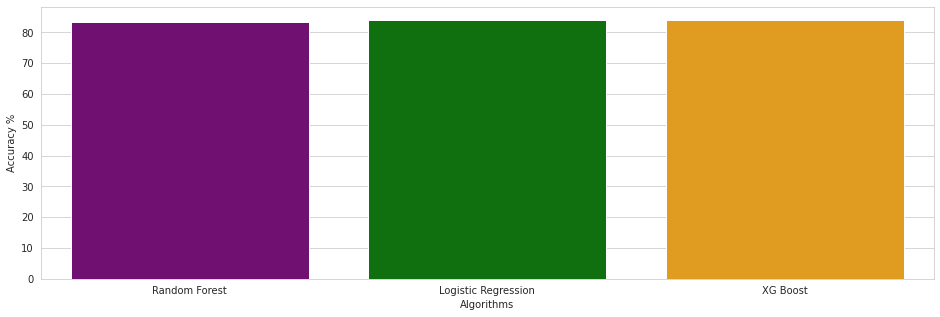

In [29]:
import matplotlib.pyplot as plt
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [30]:
## CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test,ypred)
cm_lr = confusion_matrix(y_test,ypred2)
cm_xgb = confusion_matrix(y_test,ypred3)

<function matplotlib.pyplot.show>

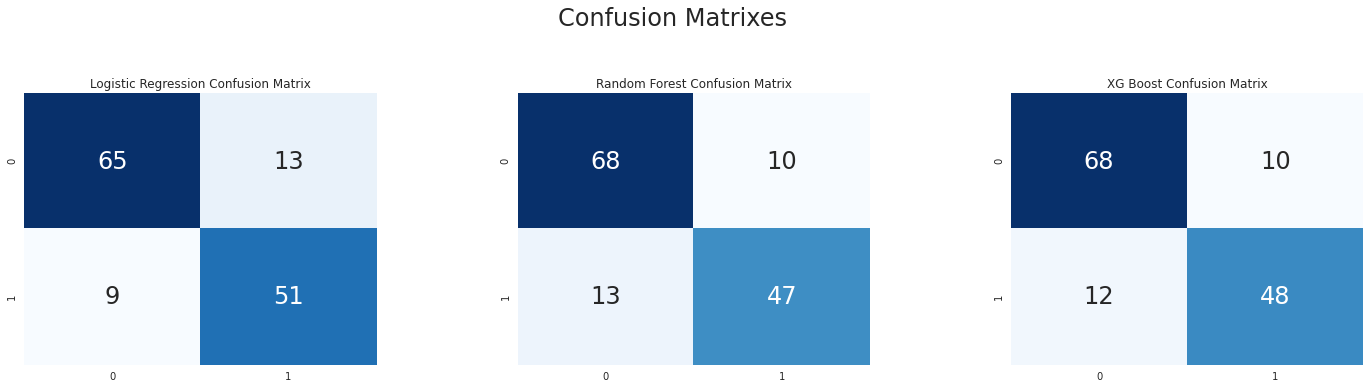

In [31]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,2)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("XG Boost Confusion Matrix")
sns.heatmap(cm_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show

In [32]:
import joblib
joblib.dump(log,'model')

['model']

In [33]:
rf.feature_importances_

array([5.53899537e-02, 6.37019593e-02, 7.46447268e-02, 6.67964123e-02,
       5.86047453e-02, 6.19431022e-02, 6.05897834e-03, 7.24348772e-03,
       1.24184949e-03, 1.67918718e-02, 1.56621289e-02, 5.10847151e-03,
       6.97329000e-03, 4.81974783e-03, 4.54769840e-03, 3.64923737e-03,
       6.25629685e-03, 6.15677839e-03, 9.41967094e-04, 5.56542587e-03,
       4.56394367e-03, 7.83037696e-03, 3.36443880e-04, 7.73002739e-03,
       6.47726061e-03, 4.43268014e-03, 2.86134530e-04, 7.39745047e-03,
       7.20814209e-03, 9.68687005e-04, 1.79092015e-03, 1.12183024e-04,
       6.64814562e-03, 1.29097199e-03, 2.07512129e-01, 1.58536158e-01,
       4.09077059e-02, 2.72073436e-02, 9.55307636e-03, 8.99396832e-03,
       5.82423457e-03, 6.31633908e-03, 5.97754823e-03])

In [34]:
weights = pd.DataFrame(rf.feature_importances_, index= X.columns.values)

In [39]:
weights

,0
C2,0.055390
C3,0.063702
C8,0.074645
C11,0.066796
C14,0.058605
C15,0.061943
C1_a,0.006059
C1_b,0.007243
C4_l,0.001242
C4_u,0.016792
